In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, utils, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

In [ ]:
# hyperparameters (실험변경 편의를 위하여 상단에 기재하였음)
batch_size = 15
epochs = 150
learning_rate = 0.15
dropout_rate = 0.13
patience = 12

In [ ]:
# input image dimensions, output dimension
img_rows, img_cols = 28, 28
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(dropout_rate))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
# compile model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy'])

# train model
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, mode='min')
model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.2,
          callbacks = [early_stop], 
          shuffle = True,
          verbose = 1)

Epoch 1/150
  73/3200 [..............................] - ETA: 57s - loss: 0.0210 - accuracy: 0.9945

KeyboardInterrupt: ignored

"Epoch 3/10"의 의미는?

"38s 77ms/step"의 의미는?

"loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.0624 - val_accuracy: 0.9827"의 의미는?

In [ ]:
# train model
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, mode='min')
hist = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.2,
          callbacks = [early_stop], 
          shuffle = True,
          verbose = 1)


# evaluate model
score = model.evaluate(x_test, y_test, verbose = 1)
print('test_loss:', score[0])
print('test_acc:', score[1])

model.save("cnn_mnist.h5")

Epoch 1/150
 574/3200 [====>.........................] - ETA: 48s - loss: 0.0207 - accuracy: 0.9938

KeyboardInterrupt: ignored

In [ ]:
# train model
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, mode='min')
hist = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.2,
          callbacks = [early_stop], 
          shuffle = True,
          verbose = 1)

Epoch 1/15
370/370 [==============================] - 44s 118ms/step - loss: 0.0223 - accuracy: 0.9929 - val_loss: 0.0384 - val_accuracy: 0.9914
Epoch 2/15
370/370 [==============================] - 43s 118ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 0.0378 - val_accuracy: 0.9908
Epoch 3/15
370/370 [==============================] - 44s 118ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0373 - val_accuracy: 0.9908
Epoch 4/15
370/370 [==============================] - 43s 117ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0369 - val_accuracy: 0.9908
Epoch 5/15
370/370 [==============================] - 43s 117ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0366 - val_accuracy: 0.9924
Epoch 6/15
370/370 [==============================] - 44s 118ms/step - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.0370 - val_accuracy: 0.9915
Epoch 7/15
370/370 [==============================] - 44s 118ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0351 - val_ac

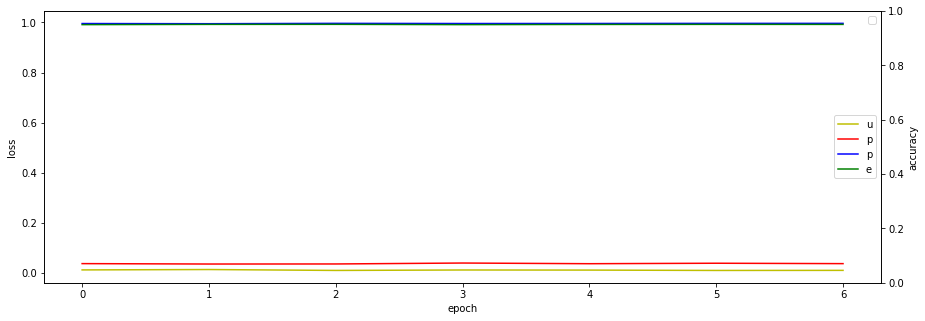

In [ ]:

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (15, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val_loss')
loss_ax.plot(hist.history['accuracy'], 'b', label = 'train_acc')
loss_ax.plot(hist.history['val_accuracy'], 'g', label = 'val_acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend('upper_left')
acc_ax.legend('lower_left')

plt.show()